In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
#this didnt work for me and i cant find a workaround for this one
# from api_keys import weather_api_key

from config import weather_api_key

# Output File (CSV)
output_data_file = "cities.csv"   
    
# # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [34]:
milk = weather_api_key()

print(milk)

86ff0f0198c2f38f58e5243b73357347


In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [36]:
# Starting URL for Weather Map API Call
# weather_api_key = "86ff0f0198c2f38f58e5243b73357347"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + milk 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
     

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tefe
Processing Record 2 of Set 1 | lexington
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | nara
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | puerto madryn
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | sabang
Processing Record 14 of Set 1 | tabuk
Processing Record 15 of Set 1 | luderitz
Processing Record 16 of Set 1 | tabou
Processing Record 17 of Set 1 | itoman
Processing Record 18 of Set 1 | dickinson
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | lorengau
Processing Record 21 of Set 1 | astipalaia
City not found. Skipping...
Processing Record 22 of Set 1 | yar-sale
Processing Record 23 of S

Processing Record 40 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 41 of Set 4 | flin flon
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | saint-pierre
Processing Record 44 of Set 4 | port alfred
Processing Record 45 of Set 4 | yulara
Processing Record 46 of Set 4 | kushima
Processing Record 47 of Set 4 | qaanaaq
Processing Record 48 of Set 4 | buchanan
Processing Record 49 of Set 4 | kroya
Processing Record 0 of Set 5 | bethel
Processing Record 1 of Set 5 | yekaterinburg
Processing Record 2 of Set 5 | ratnagiri
Processing Record 3 of Set 5 | carnarvon
Processing Record 4 of Set 5 | easthampton
Processing Record 5 of Set 5 | aitape
Processing Record 6 of Set 5 | urumqi
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | praya
Processing Record 9 of Set 5 | cabedelo
Processing Record 10 of Set 5 | faanui
Processing Record 11 of Set 5 | artyk
City not found. Skipping...
Processing Record 12 of Set 5 | te anau
Processing Reco

City not found. Skipping...
Processing Record 31 of Set 8 | boyolangu
Processing Record 32 of Set 8 | ornskoldsvik
Processing Record 33 of Set 8 | charters towers
Processing Record 34 of Set 8 | puri
Processing Record 35 of Set 8 | ferrol
Processing Record 36 of Set 8 | konin
Processing Record 37 of Set 8 | roald
Processing Record 38 of Set 8 | qaqortoq
Processing Record 39 of Set 8 | zenzeli
Processing Record 40 of Set 8 | carora
Processing Record 41 of Set 8 | kieta
Processing Record 42 of Set 8 | belmonte
Processing Record 43 of Set 8 | magnitogorsk
Processing Record 44 of Set 8 | esmeralda
Processing Record 45 of Set 8 | mareeba
Processing Record 46 of Set 8 | port hardy
Processing Record 47 of Set 8 | coquimbo
Processing Record 48 of Set 8 | vieux-habitants
Processing Record 49 of Set 8 | blackwater
Processing Record 0 of Set 9 | severnyy
Processing Record 1 of Set 9 | itacare
Processing Record 2 of Set 9 | lagoa
Processing Record 3 of Set 9 | henzada
City not found. Skipping...
P

Processing Record 19 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 20 of Set 12 | carbonia
Processing Record 21 of Set 12 | ipira
Processing Record 22 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 23 of Set 12 | honningsvag
Processing Record 24 of Set 12 | preobrazheniye
Processing Record 25 of Set 12 | ketchikan
Processing Record 26 of Set 12 | tezu
Processing Record 27 of Set 12 | freeport
Processing Record 28 of Set 12 | porto velho
Processing Record 29 of Set 12 | khuzdar
Processing Record 30 of Set 12 | cap-aux-meules
Processing Record 31 of Set 12 | lazaro cardenas
Processing Record 32 of Set 12 | eldikan
City not found. Skipping...
Processing Record 33 of Set 12 | nouakchott
Processing Record 34 of Set 12 | mayumba
Processing Record 35 of Set 12 | faridkot
Processing Record 36 of Set 12 | sajanan
Processing Record 37 of Set 12 | tayturka
Processing Record 38 of Set 12 | lasa
Processing Record 39 of Set 12 | khasan
Processing

In [37]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# # Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# # Show Record Count
city_data_pd.count()


City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [38]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tefe,-3.35,-64.71,75.60,92,93,1.01,BR,1586150922
1,lexington,37.99,-84.48,54.00,87,20,5.82,US,1586150922
2,rikitea,-23.12,-134.97,75.43,67,0,10.22,PF,1586150922
3,yellowknife,62.46,-114.35,10.40,66,20,12.75,CA,1586150922
4,saint-philippe,-21.36,55.77,82.99,58,21,5.82,RE,1586150922


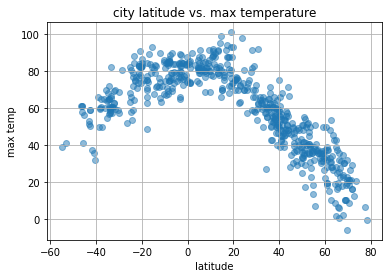

In [72]:
#latitude vs. tempterature
plt.scatter(lats, max_temps,
           linewidth=1, marker='o',
           alpha=0.5, label='cities')

plt.title("city latitude vs. max temperature")
plt.ylabel('max temp')
plt.xlabel('latitude')
plt.grid(True)

plt.savefig('lat vs temp.png')


plt.show()
#it looks like the hottest areas in the world are between -20 and 20 latitude
#which is closer to the equator. so, the further away from the equator, the more
#the temperature seems to drop. 

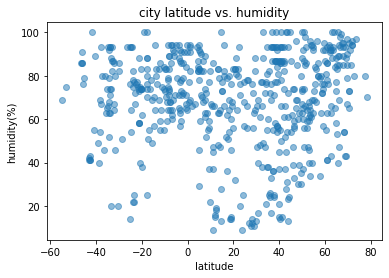

In [69]:
#latitude vs. humidity
plt.scatter(lats, humidity,
           linewidths=1, marker='o',
           alpha=0.5, label='cities')

plt.title("city latitude vs. humidity")
plt.ylabel("humidity(%)")
plt.xlabel("latitude")

plt.savefig('lat vs humidity.png')

plt.show()
#the level of humidity appears to be despearsed equally, no matter how far
#or how close to the equator. it might not play a factor when it comes to a 
#cities humidity? 

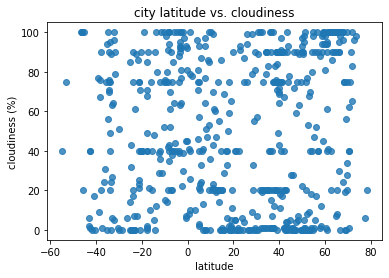

In [70]:
#latitude vs. cloudiness plot
plt.scatter(lats,
            cloudiness, linewidths=1, marker='o', alpha=0.8, label='cities')

plt.title('city latitude vs. cloudiness')
plt.ylabel('cloudiness (%)')
plt.xlabel('latitude')

plt.savefig('lat vs cloudiness.png')

plt.show()
#there are more clouds in areas just outside 20 degrees latitude

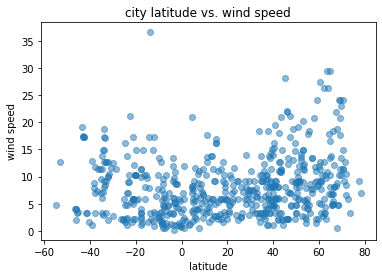

In [71]:
#latitude vs wind speed
plt.scatter(lats, wind_speed, linewidths=1, alpha=0.5, label='cities')

plt.title('city latitude vs. wind speed')
plt.xlabel('latitude')
plt.ylabel('wind speed')

plt.savefig('lat vs windspeed.png')

plt.show()
#windspeeds are less than 20 mph throughout the latitude. there might not be a 
#direct correlation between these two. 

In [52]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [53]:
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

The r-squared is: -0.912683321645483


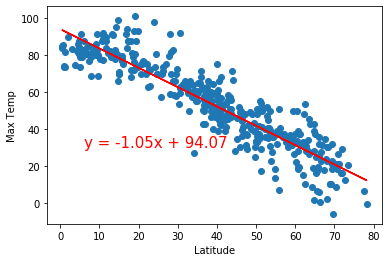

In [54]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

#theres a negative relationship here 
#as we move further away from the equator(0) the more the temperature appears
#to drop

The r-squared is: 0.719051736828549


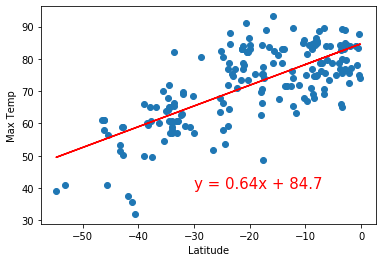

In [55]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30,40))

#positive relation
#but the temperature still appears to be dropping as we move further down 
#the southern hemisphere

The r-squared is: 0.20531732265218225


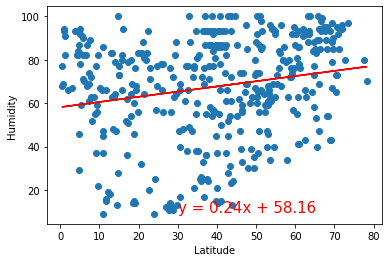

In [58]:
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(30,10))

#the humidity seems to be about even in as we move further up the northern
#hemisphere. further leading me to believe that there is little relation between
#humidity and the equator

The r-squared is: 0.17009079187947337


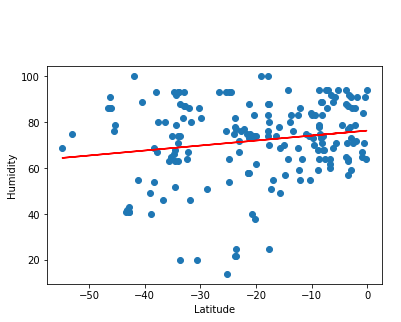

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-20,125))

#the linear regression displays more hits above 60% evenly as we move further
#from the equator. same as the northern hemisphere

The r-squared is: 0.20941675834228696


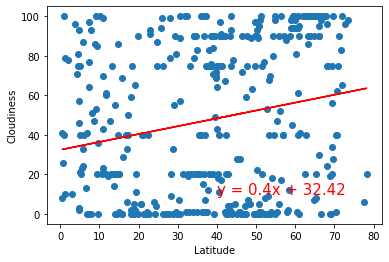

In [63]:
 # Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

#our errors are further away from the linear regression here

The r-squared is: 0.16771179226031427


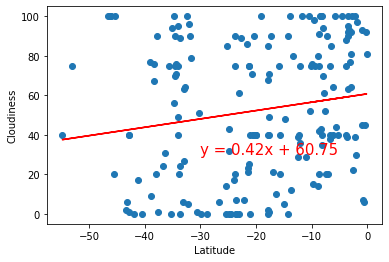

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

#errors are mostly all under the 20% of cloudiness

The r-squared is: 0.2995967368549116


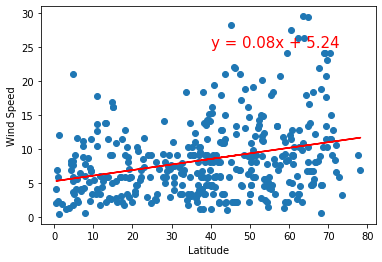

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

#positive relation
#averaging windspeeds of just below 10 mph, but it increases as we move away
#from the center of the earth.

The r-squared is: -0.2683642421993324


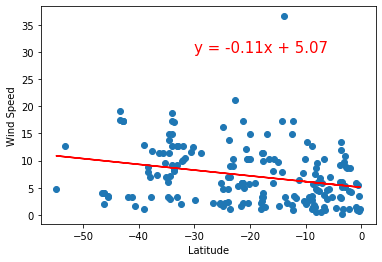

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-30,30))

#windspeeds average in the sou